# Project Title - MOVIE REVIEW SENTIMENT ANALYSIS APPLICATION😊🙂😒

# About the dataset

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.<br>
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

### Data Loading and Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\vaish\Downloads\IMDB Dataset.csv")


In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
data.shape

(50000, 2)

In [7]:
data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [8]:
type(data)

pandas.core.frame.DataFrame

In [65]:
print(f"Columns: {data.columns.tolist()}")

Columns: ['review', 'sentiment']


In [66]:
# Check for missing values
data.isnull().sum()


review       0
sentiment    0
dtype: int64

## Working With Sentiment

replaces the text labels "positive" and "negative" in the sentiment column with numeric values 1 and 0

In [9]:
data.replace({"sentiment":{"positive":1,"negative":0}},inplace=True)

In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


counts the number of occurrences of each sentiment (positive or negative) in the dataset.

In [68]:
sentiment_counts=data["sentiment"].value_counts()

In [72]:
sentiment_counts

1    25000
0    25000
Name: sentiment, dtype: int64

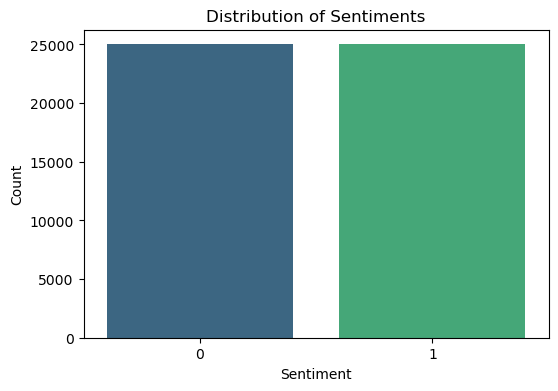

In [69]:
# sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


understand the variation in review lengths and identify any patterns,
like whether reviews tend to be short, lengthy, or varied.

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


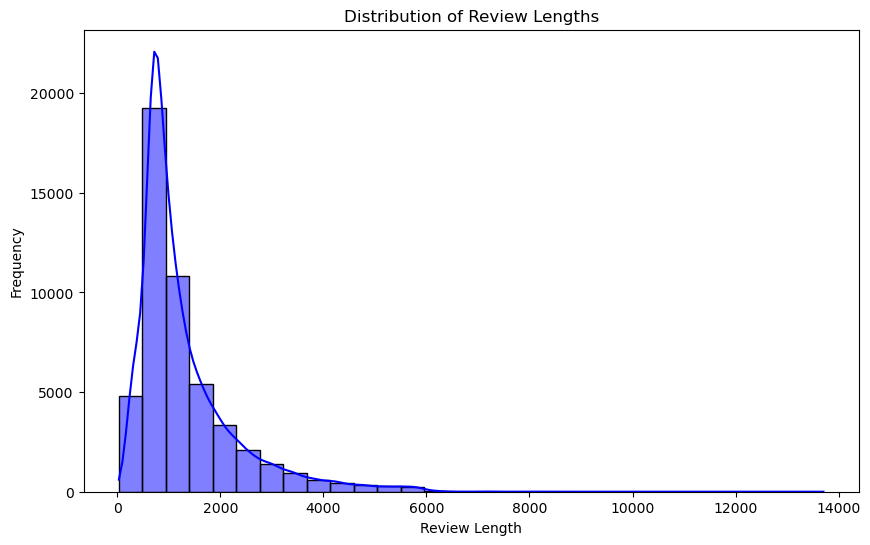

In [70]:
# Length of Reviews
# Add a column for review length
data['review_length'] = data['review'].apply(len)

print(data['review_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], kde=True, bins=30, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()


calculates the word count for each review, displays basic statistics about the word counts, and visualizes their distribution with a box plot.

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64


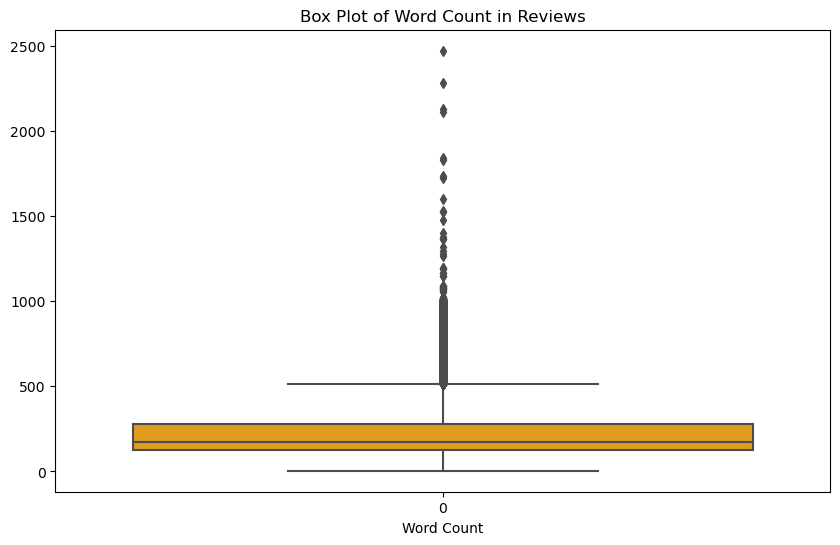

In [71]:
# Word Count Analysis
# Add a column for word count
data['word_count'] = data['review'].apply(lambda x: len(x.split()))
print(data['word_count'].describe())
plt.figure(figsize=(10, 6))
sns.boxplot(data['word_count'], color="orange")
plt.title("Box Plot of Word Count in Reviews")
plt.xlabel("Word Count")
plt.show()


Text(0.5, 1.0, 'sentiment distribution')

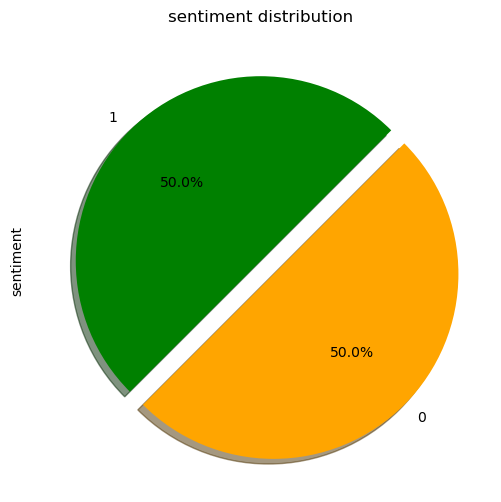

In [13]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('sentiment distribution')

## Working With review

In [14]:
data['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

## Data Preprocessing

## Cleaning steps
removing HTML Tags<br>
extracting emojies     -> The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a given text.
removing special chars,puntuation,sumbols<br>
lower casing<Br>
removing stopwords<br>
tokenization<br>

In [73]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

import re: Imports the re module for regular expressions, which is used for text manipulation, such as finding or replacing patterns in text (e.g., removing punctuation or special characters).<br>

import nltk: Imports the nltk (Natural Language Toolkit) library, which provides various NLP tools, including tokenization, stemming, and stopword removal.<br>

from nltk.stem.porter import PorterStemmer: Imports the Porter Stemmer, a tool used for stemming (reducing words to their root form), which helps in normalizing words like "running" to "run".<br>

from nltk.corpus import stopwords: Imports a list of stopwords (commonly used words like "the", "is", "in", etc.), which are often removed in NLP tasks since they don’t add much meaningful information.

In [16]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

The preprocessing function cleans text by removing HTML tags, emojis, non-alphabetic characters, stopwords, and then stemming the remaining words.

In [17]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [18]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

## Visualizing Negative and Positive Words

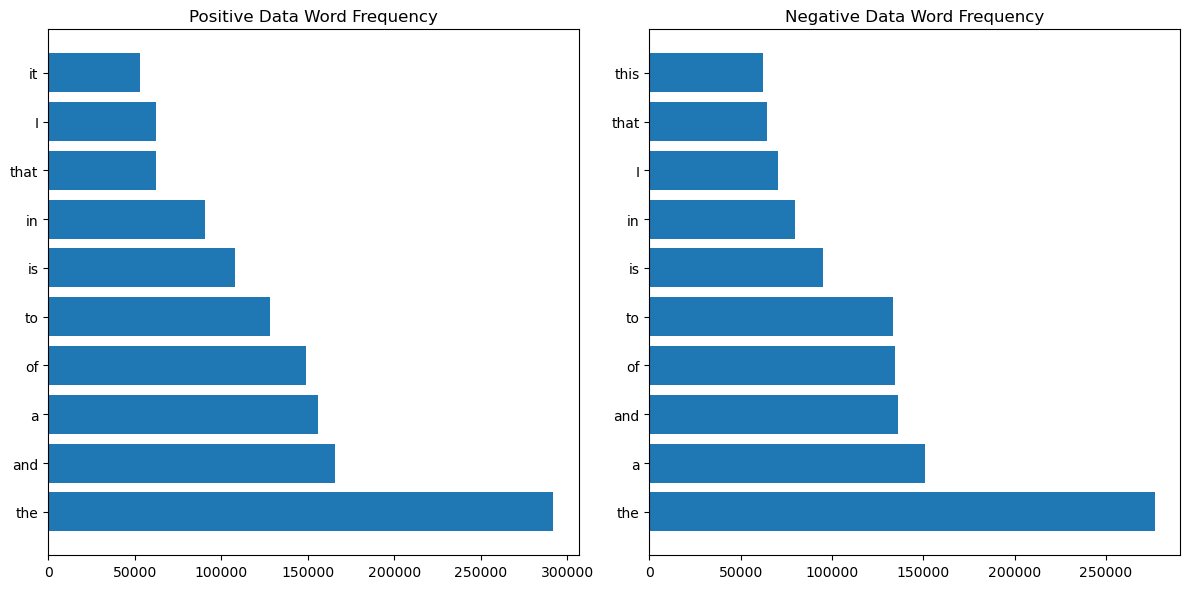

In [19]:
positivedata = data[data['sentiment'] == 1]
positivedata = positivedata['review']
negdata = data[data['sentiment'] == 0]
negdata = negdata['review']

from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

## TF-IDF Vertorizer to convert the raw documents into feature matrix

TfidfVectorizer(Term Frequency-Inverse Document Frequency) converts text reviews into numerical features (TF-IDF scores), where each review is represented as a vector. The sentiment labels (y) are stored separately, and these vectors can be used for machine learning models to predict sentiment.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)

##  Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

splits the dataset into training (80%) and testing (20%) sets

In [22]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)

In [23]:
train_data.shape

(40000, 2)

In [24]:
test_data.shape

(10000, 2)

Tokenizer to process text data, limiting the vocabulary to the top 5000 most frequent words, and then fits the tokenizer on the training set reviews to build the word index.

In [25]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])

converts the text reviews into sequences of integers (where each word is replaced by its index in the tokenizer's word index) and then pads these sequences to ensure they all have a fixed length of 200 words

In [26]:
X_train=pad_sequences(tokenizer.texts_to_sequences(train_data["review"]),maxlen=200)
X_test=pad_sequences(tokenizer.texts_to_sequences(test_data["review"]),maxlen=200)

In [27]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]])

In [28]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]])

In [29]:
Y_train=train_data["sentiment"]
Y_test=test_data["sentiment"]

In [30]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [75]:
Y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64

## Build LSTM(Long Short-Term Memory) Model

This model is a sequential neural network for binary sentiment classification, using an embedding layer for word representations, an LSTM layer to capture sequential dependencies, and a dense output layer with a sigmoid function to predict sentiment labels.

In [32]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.build(input_shape=(None, 200))  # Build the model explicitly



C:\Users\vaish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

compiles the model for binary classification using the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric

In [34]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

The model will be trained for 5 epochs, processing 64 reviews at a time, and using 20% of the training data for validation.

In [35]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 234s 454ms/step - accuracy: 0.7306 - loss: 0.5259 - val_accuracy: 0.8236 - val_loss: 0.4002
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 230s 460ms/step - accuracy: 0.8269 - loss: 0.4097 - val_accuracy: 0.8460 - val_loss: 0.3624
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 239s 479ms/step - accuracy: 0.8598 - loss: 0.3432 - val_accuracy: 0.8735 - val_loss: 0.3147
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 236s 472ms/step - accuracy: 0.8919 - loss: 0.2752 - val_accuracy: 0.8569 - val_loss: 0.3507
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 234s 468ms/step - accuracy: 0.8911 - loss: 0.2752 - val_accuracy: 0.8712 - val_loss: 0.3286


In [36]:
model.save('my_model.keras')

The model is evaluated on the test data, and it returns the loss and accuracy metrics to assess its performance.

In [37]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 99ms/step - accuracy: 0.8812 - loss: 0.3160


In [38]:
print(loss)


0.31189635396003723


In [39]:
print(accuracy)


0.8841999769210815


This saves the tokenizer to a file so it can be reused later without retraining.

In [40]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [41]:
['tokenizer.pkl']


['tokenizer.pkl']

# Building Predictive System


This function takes a review, tokenizes and pads it, makes a prediction using the trained model, and returns whether the sentiment is "positive" or "negative".

In [58]:
def predictive_system(review):
    # Tokenize and pad the input review
    sequences = tokenizer.texts_to_sequences([review])
    print(f"Tokenized Sequence: {sequences}")  # Debugging: Check tokenization

    padded_sequence = pad_sequences(sequences, maxlen=200)
    
    prediction = model.predict(padded_sequence, verbose=0)
    print(f"Prediction Score: {prediction[0][0]}")  

    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment
result = predictive_system("This movie was fantastic")
print(f"Predicted Sentiment: {result}")


Tokenized Sequence: [[11, 17, 13, 826]]
Prediction Score: 0.7628802061080933
Predicted Sentiment: positive


In [59]:
predictive_system("A trilling adventure with stunning visual")

Tokenized Sequence: [[3, 1170, 16, 1412, 1084]]
Prediction Score: 0.9632441997528076


'positive'

In [60]:
predictive_system("Overall long and slow")

Tokenized Sequence: [[442, 190, 2, 561]]
Prediction Score: 0.4935157895088196


'negative'

In [61]:
predictive_system("A visual masterpiece")

Tokenized Sequence: [[3, 1084, 932]]
Prediction Score: 0.9405654668807983


'positive'

In [62]:
review_sentiment = predictive_system("Beautiful cinematography")

Tokenized Sequence: [[315, 625]]
Prediction Score: 0.8449392914772034


In [63]:
review_sentiment

'positive'

In [64]:
predictive_system("I loved every minute of it. The characters were relatable, and the plot twists kept me on the edge of my seat")

Tokenized Sequence: [[10, 427, 172, 791, 4, 9, 1, 102, 70, 2, 1, 110, 1267, 801, 68, 20, 1, 1248, 4, 56, 2033]]
Prediction Score: 0.9969888925552368


'positive'

## Deploy the Application Using Gradio

creates and launches an interactive web app where users can input a movie review, and it will return the predicted sentiment (positive or negative) using the predictive_system function. The app is shareable via a generated link.

In [54]:
import gradio as gr
title="MOVIE SENTIMENT ANALYSIS APPLICATION"
app=gr.Interface(fn=predictive_system,inputs="textbox",outputs="textbox",title=title)
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://e2fbb3999856ab303a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Conclusion 

In this project, we developed a Movie Sentiment Analysis Application using deep learning. After preprocessing the data by cleaning and tokenizing the reviews, we built an LSTM model to classify sentiments as positive or negative. The model was then evaluated for accuracy and deployed using a Gradio interface, allowing users to input movie reviews and receive real-time sentiment predictions. This project demonstrates the practical use of machine learning for sentiment analysis in text data.